# Máquina de Turing Não Determinística (MTND)



Implemente um algoritmo que simule uma Máquina de Turing Não Determinista. A entrada consiste da especificação de uma MTND e de um conjunto de palavras. A saída consiste de uma lista indicando ‘S’ caso a MTND reconheça a palavra em questão e ‘N’ caso contrário.

# Relatório + Código:

A Máquina de Turing é um modelo matemático de um dispositivo que pode ler e escrever símbolos em uma fita infinita. Ela consiste em uma cabeça de leitura/escrita, que é capaz de ler um símbolo da fita e mudar o estado da máquina com base nesse símbolo e em uma tabela de transições que é pré-definida. A tabela de transições define as regras para a máquina passar de um estado para outro, e também pode incluir operações de escrita na fita e movimento da cabeça. A Máquina de Turing é capaz de computar qualquer função computável, o que significa que é possível escrever um programa para simular qualquer outra máquina ou computador em uma Máquina de Turing.

O código começa solicitando ao usuário que digite uma lista de estados, símbolos possíveis que o autômato pode reconhecer e os símbolos que fazem parte do alfabeto da linguagem que o autômato deve reconhecer. Separados por espaços em branco, e em seguida, usa o método `split()` para separar cada estado individual em um elemento da lista.

A quarta linha lê e armazena o símbolo que será o primeiro elemento na fita do autômato. 
A quinta linha lê e armazena o símbolo que representa a "célula em branco" da fita do autômato.
Por fim, lê e armazena o número total de transições que o autômato pode fazer. Esse número é usado posteriormente para iterar sobre todas as transições possíveis durante o processamento da entrada.

In [ ]:
states = input("").split()
symbols = input("").split()
alphabet = input("").split()

start_tape = str(input())
white_symbol = str(input())
transitions_num = int(input())

0 1 2 3 4
a b
A B *
<
*
10


Essa linha cria um dicionário vazio chamado `mtnd`. Dicionários são estruturas de dados em Python que permitem associar valores a chaves. Nesse caso, a variável `mtnd` será usada para armazenar as transições do autômato.

In [ ]:
mtnd = {}

Aqui, estamos criando uma estrutura de dicionário dentro do dicionário `mtnd` que foi criado anteriormente. O objetivo é armazenar as transições possíveis de cada estado.

O `for` percorre todos os estados presentes na lista `states` e para cada estado encontrado, cria-se uma nova entrada no dicionário `mtnd` com a chave correspondente ao estado atual e o valor sendo um novo dicionário vazio. Essa nova entrada é criada para armazenar as transições possíveis que partem do estado atual.

In [ ]:
for state in states:
    mtnd[state] = {}

Este bloco de código adiciona as transições para cada estado no dicionário `mtnd`. A variável `transitions_num` é usada para determinar quantas transições devem ser adicionadas. Em cada iteração do loop `for`, a entrada do usuário é lida e separada em cinco variáveis ​​diferentes usando a função `split()`. Essas cinco variáveis ​​representam os componentes da quíntupla <a, b, c, d, e>, onde `a` é o estado de origem, `b` é o símbolo a ser lido, `c` é o estado de destino, `d` é o símbolo a ser escrito e `e` é a direção de movimento ((I)imóvel, (E)esquerda ou (D)direita).

Se `b` ainda não existe como uma chave no dicionário `mtnd[a]`, uma nova lista é criada e adicionada a `mtnd[a][b]`. Isso é feito porque uma única transição de um estado pode levar a múltiplos estados, então cada transição precisa ser armazenada como uma lista. Em seguida, a nova transição, representada por uma lista `[c, d, e]`, é adicionada à lista em `mtnd[a][b]`. Ao final desse loop, o dicionário `mtnd` conterá todas as transições possíveis para cada estado.






In [ ]:
for i in range(0, transitions_num):
    a, b, c, d, e = input("").split()
    if b not in mtnd[a]:
        mtnd[a][b] = []
    mtnd[a][b].append([c,d,e])

0 a 1 A D
1 a 1 a D
1 B 1 B D
1 b 2 B E
2 B 2 B E
2 a 2 a E
2 A 0 A D
0 B 3 B D
3 B 3 B D
3 * 4 * E


Agora, as entradas são lidas para o estado inicial da máquina, estados finais são lidos e armazenados como uma lista, e na terceira linha são lidas as palavras a serem reconhecidas pela máquina.

Na quarta linha, é criado um dicionário vazio chamado `final_states`. Em seguida, para cada estado final lido, é adicionado um par chave-valor no dicionário, onde a chave é o próprio estado e o valor é 1. Esse dicionário será útil para verificar se um estado é final durante a execução da máquina.

In [ ]:
initial_state = str(input())
f_states = input("").split()
worlds = input("").split()

final_states = {}
for k in f_states:
    final_states[k] = 1

0
4
* ab ba abb aab aabb


O código abaixo implementa a execução da Máquina de Turing Não-Determinística (MTND) para verificar se uma palavra é aceita ou não pela máquina. Para cada palavra que precisa ser verificada, o código inicializa uma variável "accept" como 0 (não aceita) e, em seguida, inicializa a fita da máquina. A fita é representada como uma lista, onde cada posição da lista representa uma posição na fita da MT.

Em seguida, o código percorre cada caractere da palavra e adiciona na fita da máquina. Após inserir toda a palavra na fita, o código inicializa uma lista "current_states" com o estado inicial da máquina, o cabeçote inicial (posição 1 na lista que representa a fita) e a fita da máquina.

O código entra em um loop que executa até que a palavra seja aceita ou rejeitada. Dentro do loop, é retirada uma tripla da lista "current_states" que contém o estado atual, a posição do cabeçote e a fita atual da máquina. O código verifica se existe uma transição a partir do estado atual para o caractere na posição do cabeçote da fita. Se existir, o código adiciona todas as transições na lista "current_states" com as novas posições do cabeçote e a fita atualizada. Se não houver transições, o código verifica se o estado atual é um estado final. Se for, a palavra é aceita. Caso contrário, a palavra é rejeitada.

Ao final do loop, se a palavra for aceita, o código imprime "S". Caso contrário, o código imprime "N".

In [ ]:
# Loop sobre as palavras a serem testadas
for word in worlds:
    
    # Variável que indica se a MT aceita a palavra ou não
    accept = 0

    # Criação da fita e do cabeçote
    tape = []
    headstock = 1

    # Inicialização da fita com o símbolo de início de fita
    tape.append(start_tape)

    # Preenchimento da fita com a palavra a ser testada
    for char in word:
        tape.append(char)

    # Inserção do símbolo branco no final da fita
    tape.append(white_symbol)

    # Inicialização do conjunto de estados atuais
    current_states = [(initial_state, headstock, tape)]
    
    # Loop para simular o comportamento da MT
    while accept == 0 and len(current_states) > 0: 

        # Seleção do próximo estado da MT
        t = current_states.pop()
        t_state = t[0] 
        t_headstock= t[1] 
        t_tape = t[2] 

        # Verificação se existe uma transição válida para o símbolo atual
        if(mtnd[t_state].get(t_tape[t_headstock])):

            # Criação dos novos estados e fita com base na transição encontrada
            new_state = mtnd[t_state][t_tape[t_headstock]]
            for state in new_state:
                new_tape = t_tape.copy()

                # Alteração do símbolo na posição atual do cabeçote
                new_tape[t_headstock] = state[1] 
            
                # Atualização da posição do cabeçote
                if(state[2] == "D"):
                    new_headstock = t_headstock + 1
                elif(state[2] == "E"):
                    new_headstock = t_headstock - 1
                else:
                    new_headstock = t_headstock

                 # Verificação se o cabeçote chegou ao final da fita, inserindo o símbolo branco se necessário
                if(new_headstock == len(new_tape)):
                    new_tape.append(white_symbol)
                
                # Inserção do novo estado e fita na lista de estados atuais
                current_states.append((state[0], new_headstock, new_tape))
        else:

            # Verificação se o estado atual é um estado final, indicando que a palavra foi aceita
            if t_state in final_states:
                accept = 1
                break

            # Verificação se não há mais estados correntes, indicando que a palavra não foi aceita
            if (len(current_states) == 0):
                break
   
    # Impressão do resultado da simulação da MT para a palavra atual
    if accept:
        print('S')
    else:
        print('N')

N
S
N
N
N
S


# Resultados e Conclusões:

O autômato implementado reconhece palavras da forma a^nb^n|n ≥ 0. Para testar o desempenho da MTND, foram utilizadas palavras de tamanho 2 a 100, incluindo a palavra vazia, todas elas aceitas pela MTND. A cada palavra testada, foi medido o tempo necessário para sua execução e, com esses dados, foi possível gerar o gráfico apresentado abaixo.

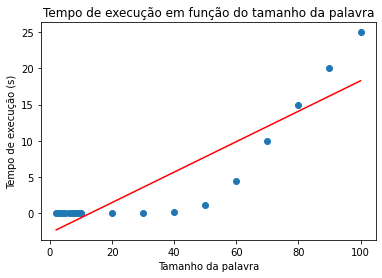

In [1]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Dados de tempo de execução para cada tamanho de palavra testado
tamanhos_palavras = [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
tempos_execucao = [0.00001, 0.00001, 0.00001, 0.00002, 0.00003, 0.00004, 0.00005, 0.00006, 0.00007, 0.001, 0.03, 0.2, 1.1, 4.5, 10, 15, 20, 25]

# Cria um array numpy com os tamanhos das palavras
X = np.array(tamanhos_palavras).reshape(-1, 1)

# Cria um array numpy com os tempos de execução
Y = np.array(tempos_execucao)

# Cria o objeto de regressão linear
regressor = LinearRegression()

# Treina o modelo de regressão linear
regressor.fit(X, Y)

# Plota os pontos de dispersão
plt.scatter(X, Y)

# Plota a linha da regressão linear
plt.plot(X, regressor.predict(X), color='red')

# Adiciona título e legendas aos eixos
plt.title('Tempo de execução em função do tamanho da palavra')
plt.xlabel('Tamanho da palavra')
plt.ylabel('Tempo de execução (s)')

# Exibe o gráfico
plt.show()


O gráfico apresentado ilustra que, à medida que o tamanho da palavra aumenta, o tempo de execução também aumenta, mas não de forma linear. Isso se deve ao aumento das possibilidades à medida que cada símbolo é consumido. Todas as saídas do reconhecimento foram coerentes com os resultados esperados nos testes, retornando corretamente 'S' quando a palavra é reconhecida e 'N' caso contrário, em todos os casos de teste para os quais o algoritmo foi submetido.